In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_hist = "data/History"
path_sat = "data/Satellite"

input_china = path_hist + "/China_admin_1080.shp"
input_sat = path_sat + "/Nightlight_2013.tif"

(3300000.0, 3400000.0)

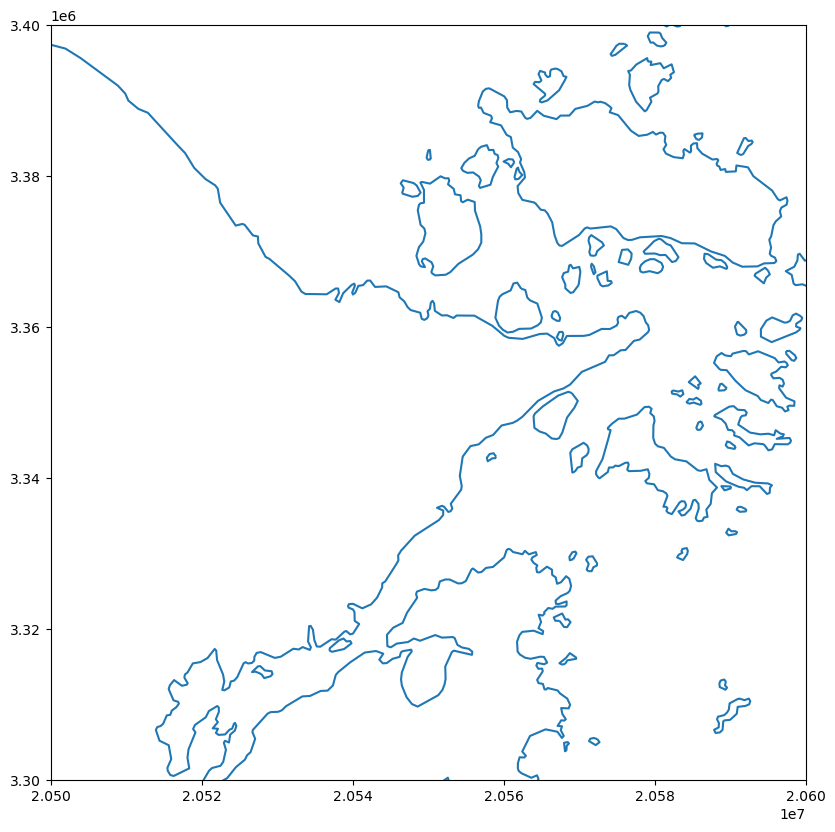

In [105]:
fig, ax = plt.subplots(1,1,figsize=(10,10), dpi=100)

china = gpd.read_file(input_china)
china = china.dissolve(by='H_SUP_PROV')
china.boundary.plot(ax=ax)
# china = china.boundary
# china = china.to_crs("EPSG:32634")
# china.geometry = china.geometry.buffer(20000, 6)
# china = china.to_crs("EPSG:4326")

# buffer = china.boundary.buffer(20000)
# buffer.plot(alpha=0.2, ax=ax)

ax.set_xlim(20500000, 20600000)
ax.set_ylim(3300000, 3400000)

In [93]:
from shapely.geometry import Polygon, Point
import random

def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds

    points = []

    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append({"geometry": random_point})

    return points


def get_points_along_boundary(gdf, n, radius=20000):
    buffer = gdf.boundary.buffer(radius)
    allpoints = []
    for b in buffer.index:
        points = random_points_within(buffer[b],n)
        allpoints = [*allpoints, *points]
    return gpd.GeoDataFrame(allpoints)
    

In [107]:
points = get_points_along_boundary(china, 10000)

(3300000.0, 3400000.0)

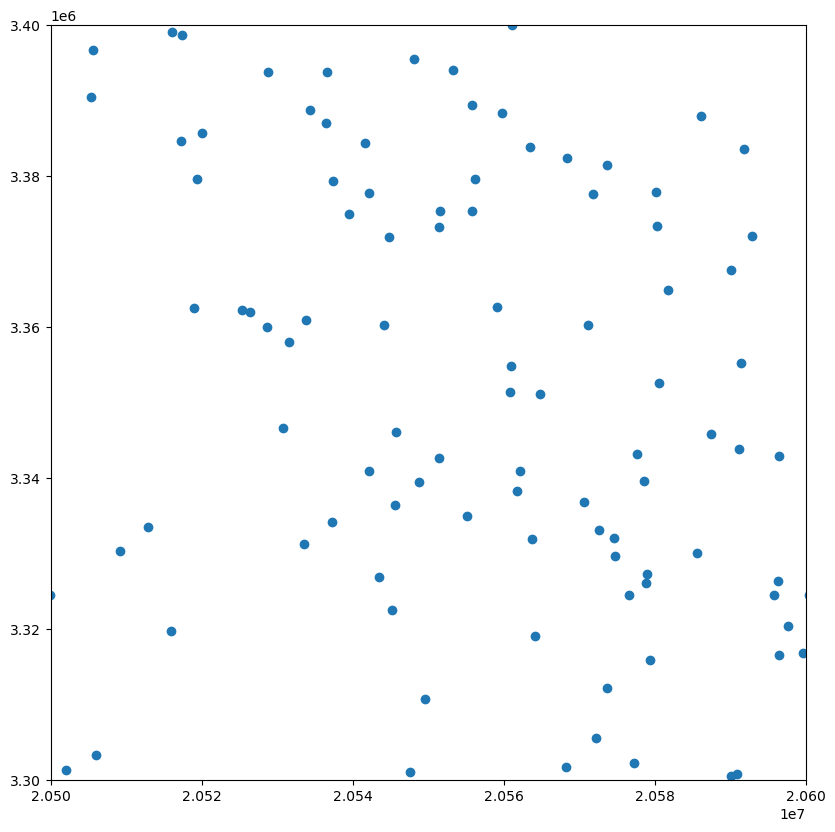

In [108]:
fig, ax = plt.subplots(1,1,figsize=(10,10), dpi=100)
points.plot(ax=ax)

ax.set_xlim(20500000, 20600000)
ax.set_ylim(3300000, 3400000)